In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Core Missions

## Data Read and Info

In [139]:
abengers_df = pd.read_csv('./charcters_stats.csv')
abengers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
Name            611 non-null object
Alignment       608 non-null object
Intelligence    611 non-null int64
Strength        611 non-null int64
Speed           611 non-null int64
Durability      611 non-null int64
Power           611 non-null int64
Combat          611 non-null int64
Total           611 non-null int64
dtypes: int64(7), object(2)
memory usage: 43.0+ KB


In [4]:
abengers_df.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


## 1. 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.

In [140]:
abengers_df.sort_values('Total',ascending=False)['Name'].iloc[0]

'Martian Manhunter'

In [141]:
abengers_df.dtypes

Name            object
Alignment       object
Intelligence     int64
Strength         int64
Speed            int64
Durability       int64
Power            int64
Combat           int64
Total            int64
dtype: object

## 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.

In [143]:
# 3개의 결측치만 존재하므로 dropn 을 시켰다.
abengers_df = abengers_df.dropna(axis=0)

In [145]:
alignment_group = abengers_df.groupby(['Alignment']).mean()

In [171]:
alignment_group

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Alignment,,,,,,,
bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303,247.212121
good,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648,214.990741
neutral,60.909091,45.727273,46.727273,75.545455,58.818182,67.636364,355.363636


In [66]:
alignment_bad = abengers_df[abengers_df['Alignment'] =='bad']
alignment_good = abengers_df[abengers_df['Alignment'] =='good']
alignment_neutral = abengers_df[abengers_df['Alignment'] =='neutral']

- 시각화에 대해서 총 3 가지 방식으로 진행하였습니다.
1. <code>sns.kdeplot()</code>
2. subplots 을 활용한 <code>stripplot()</code>
3. <code>catplot()</code>

### 1. sns.kdeplot()

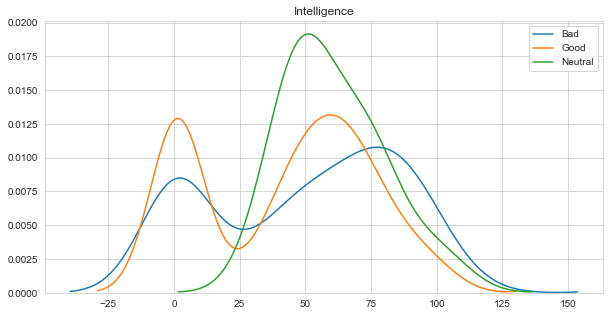

In [177]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1, figsize=(10, 5)) 
sns.kdeplot(data=alignment_bad.sort_values('Intelligence')['Intelligence'], ax=ax) 
sns.kdeplot(data=alignment_good.sort_values('Intelligence')['Intelligence'], ax=ax)
sns.kdeplot(data=alignment_neutral.sort_values('Intelligence')['Intelligence'], ax=ax)

'''
평균선을 그리려 하였지만, 값이 비슷비슷해 시각적으로 좋지않아 제외하였습니다
'''
#plt.axvline(x= alignment_group['Intelligence']['bad'], linestyle='--',linewidth=0.2, color='blue', label="spot")
#plt.text(alignment_group['Intelligence']['bad'] + 3,0.001,'Bad - Means',fontsize=10)

#plt.axvline(x= alignment_group['Intelligence']['bad'], linestyle='--',linewidth=0.2, color='blue', label="spot")
#plt.text(alignment_group['Intelligence']['good'] + 3,0.001,'Good - Means',fontsize=10)

#plt.axvline(x= alignment_group['Intelligence']['bad'], linestyle='--',linewidth=0.2, color='blue', label="spot")
#plt.text(alignment_group['Intelligence']['neutral'] + 3,0.001,'Neutral - Means',fontsize=10)


plt.legend(['Bad', 'Good', 'Neutral'])
plt.title("Intelligence")
plt.show()



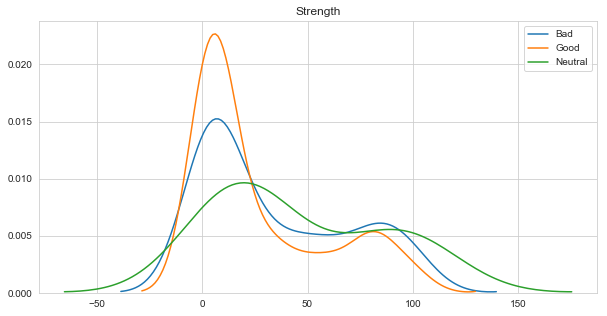

In [165]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'bad'].sort_values('Strength')['Strength'], ax=ax) 
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'good'].sort_values('Strength')['Strength'], ax=ax)
sns.kdeplot(data=abengers_df[abengers_df.Alignment == 'neutral'].sort_values('Strength')['Strength'], ax=ax)
plt.legend(['Bad', 'Good', 'Neutral'])
plt.title("Strength")

plt.show()


### 2. sns.stripplot()

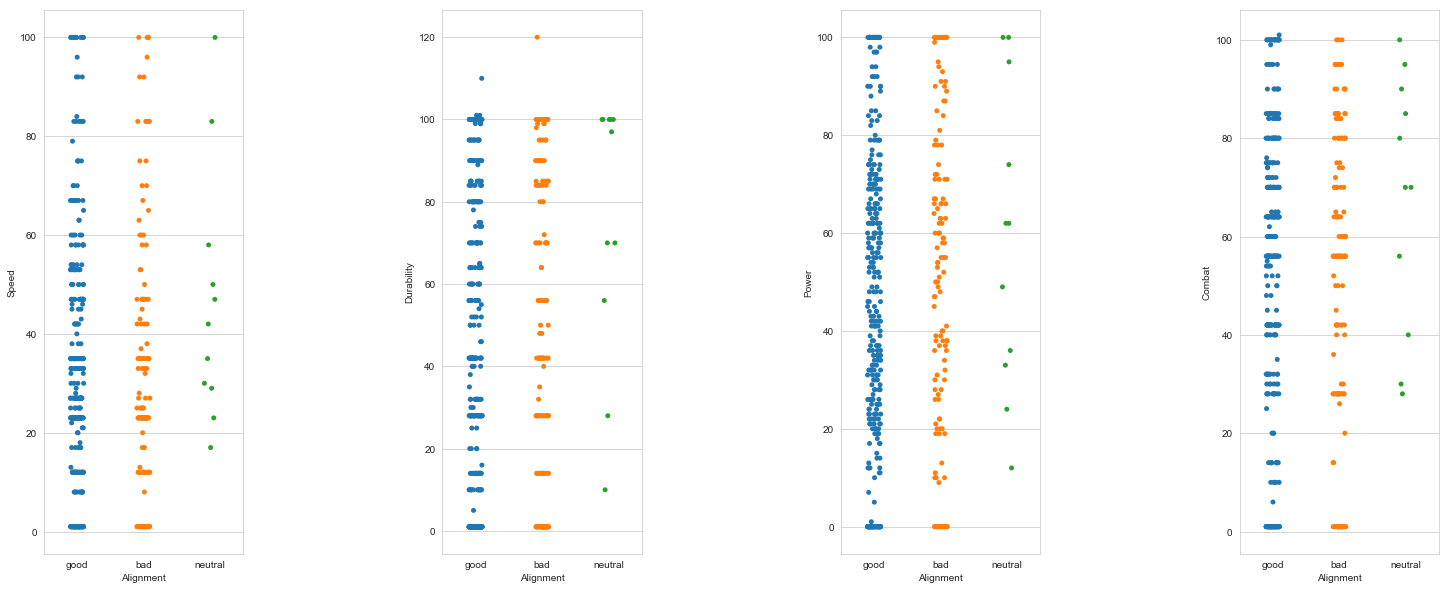

In [186]:
fig, axes = plt.subplots(ncols=4, figsize=(25,10))
plt.subplots_adjust(wspace=1)

sns.stripplot(x='Alignment', y='Speed', data=abengers_df, ax=axes[0])
sns.stripplot(x='Alignment', y='Durability', data=abengers_df, ax=axes[1])
sns.stripplot(x='Alignment', y='Power', data=abengers_df, ax=axes[2])
sns.stripplot(x='Alignment', y='Combat', data=abengers_df, ax=axes[3])

plt.show()

### 3. sns.catplot()

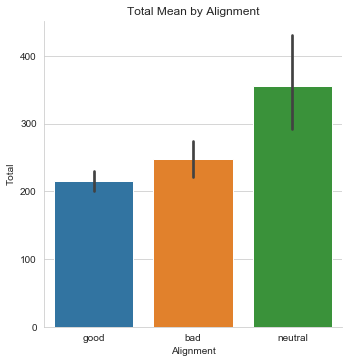

In [187]:
sns.catplot(x='Alignment', y='Total', kind='bar', data=abengers_df)
plt.title('Total Mean by Alignment')
plt.show()

kde plot 은 Alignment 별 분포가 한 눈에 파악하기 쉽게 되어있어 해당 데이터의 시각화에 있어 좋은 그래프인 것 같습니다. stripplot() 또한 현재 데이터에는 데이터 양 자체가 많지 않아 어느정도 쉽게 파악이 가능하지만 데이터양이 많아진다면 시각화에 있어 상당히 지저분해질 것 같습니다. 마지막으로 catplot 으로 사용한 bar 그래프 같은 경우에는 전체적인 분포가 아니라 평균을 비교하므로 다른 그래프를 통해 전체적인 데이터 분포를 시각화하며 마무리로 사용하기에 좋은 그래프인 것 같습니다.